# Introduction

[Normal distributions](https://www.wikiwand.com/en/Normal_distribution) are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. The Normal distribution is a continuous theoretical probability distribution. In this article, I am going to explore the Normal distribution using Jupyter.

Let's import all the necessary libraries.

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Normal Distribution Probability Density Function

$
\text{Probability density function (PDF) of the normal distribution is} \\
$
$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}\text{, where $x\in \mathbb{R}$}
$$

The random variable $X$ described by the PDF is a normal variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$.

$
\text{Normal distribution notation is} \\
$
$$
X \sim N(\mu,\sigma^2) \\
$$

The area under the curve equals 1.

$$
\int \limits _{-\infty} ^{+\infty}f(x)dx=1
$$

## `norm.pdf` value

`norm.pdf` retuns a pdf value. The following is the pdf value when $x=1$, $\mu=0$, $\sigma=1$.

In [3]:
norm.pdf(x=1.0, loc=0, scale=1)

0.24197072451914337

NameError: name 'stats' is not defined

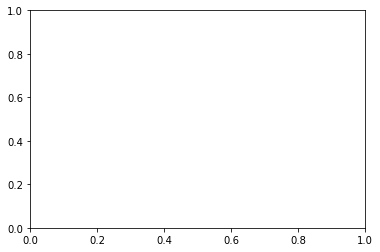

In [5]:
fig, ax = plt.subplots()

mu = 0.34
sigma = 0.15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()



Since `norm.pdf` returns a PDF value, we can use this function to plot the normal distribution function. 
We graph a PDF of the normal distribution using `scipy`, `numpy` and `matplotlib`. We use the domain $-4<x<4$, range $0<f(x)<0.45$, default $\mu=0$ and $\sigma=1$. `plot(x-values,y-values)` produces the graph. 


In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)

plt.show()

A normal curve is smooth bell-shaped. It is symmetrical about the $x=\mu$, and has a maximum point at $x=\mu$.

## Normal distribution PDF with different standard deviations

Let's plot probability distribution functions of a normal distribution where the mean has different standard deviations.

`scipy.norm.pdf` has keywords, `loc` and `scale`. The location (loc) keyword specifies the mean and the scale (scale) keyword specifies the standard deviation.

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]

for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

## Normal distribution PDF with different means

Let's plot probability distribution functions of normal distribution where the standard deviation is 0 and different means. 

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]

for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

The mean of the distribution determines the location of the center of the graph. As you can see in the above graph, the shape of the graph does not change by changing the mean, but the graph is translated horizontally.

# Using random normal distribution values

`norm.rvs` generates random normal distribution numbers according to the `scale` which is the standard deviation, the `loc` which is the mean and the size. We create a histogram for the generated numbers and add the PDF.

In [ ]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,size=1000)
x = np.linspace(-10,10,100)
p = norm.pdf(x,scale=2)
v = np.var(xs)
m = np.mean(xs)

ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
ax.grid(True)

# Cumulative normal distribution function

The cumulative distribution function of a random variable X, evaluated at x, is the probability that X will take a value less than or equal to x. Since the normal distribution is a continuous distribution, the shaded area of the curve represents the probability that X is less or equal than x. 

$$
P(X \leq x)=F(x)=\int \limits _{-\infty} ^{x}f(t)dt \text{, where }x\in \mathbb{R}
$$

Using `fill_between(x, y1, y2=0)` fill up the area between two curves `y1` and `y2` which has the default is 0.


In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

# Calculating probability of normal distribution

Given the mean of 3 and the standard deviation of 2,  we can find the probability of $P(X<2)$.

$$X \sim N(3,2^2)$$

In `norm.cdf`, the location (loc) keyword specifies the mean and the scale (scale) keyword specifies the standard deviation.

In [ ]:
from scipy.stats import norm

lessthan2=norm.cdf(x=2, loc=3, scale=2)
print(lessthan2)

Let's plot a graph.

In [ ]:
fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')

# for text
ax.text(-0.5,0.02,round(lessthan2,2), fontsize=20)
plt.show()

## Interval between variables

To find the probability of an interval between certain variables, you need to subtract `cdf` from another `cdf`. Let's find $P(0.5<X<2)$ with a mean of 1 and a standard deviation of 2.

$$X \sim N(1,2^2)$$

In [ ]:
norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)

Here is the graph. $$X \sim N(1,2^2), P(0.5<X<2)$$

In [ ]:
fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)


px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')

pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()


To find the probability of $P(X>4)$, we can use `sf` which is called the survival function and it returns `1-cdf`. For example, `norm.sf(x=4, loc=3, scale=2` returns the probability which is greater than $x=4, P(X>4)$ when $\mu=4, \sigma=2$.

In [ ]:
gr4sf=norm.sf(x=4, loc=3, scale=2)
gr4sf

Let's plot a graph.

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')

ax.text(4.5,0.02,"sf(x) %.2f" %(gr4sf), fontsize=20)
plt.show()

The above graph is the same as $1-P(X<4)$.

In [ ]:
gr4=norm.cdf(x=4, loc=3, scale=2)
gr14=1-gr4

fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
px1=np.arange(-4,4,0.01)
ax.fill_between(px1,norm.pdf(px1,loc=3,scale=2),alpha=0.5, color='r')
ax.text(4.5,0.02,round(gr14,2), fontsize=20)
ax.text(1,0.02,round(gr4,2), fontsize=20)
plt.show()

# Finding quantiles

$k$ in $P(X \leq k)=0.95$ is known as quantile, in this case the 95% quantile.

## Percent point function

`ppf` is the inverse of `cdf` and it is called Percent point function.
Given the mean of 1 and the standard deviation of 3, we can find the quantile `a` in $P(X<a)=0.506$ by using `ppf`. 

$$X \sim N(1,3^2)$$

In [ ]:
norm.ppf(q=0.506, loc=1, scale=3)

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=3))
ax.set_title("N(1,$3^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

xpoint=norm.ppf(q=0.506, loc=1, scale=3)
px=np.arange(-10,xpoint,0.01)
ax.set_ylim(0,0.15)
ax.fill_between(px,norm.pdf(px,loc=1,scale=3),alpha=0.5, color='g')

ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.506", fontsize=20)
plt.show()

## Inverse survival function



With the same mean and standard deviation, we can find the quantile `b` in $P(X>b)=0.198$ using the inverse survival function `isf`. This is the same as using `ppf` with $q=(1-0.198)$.

$$X \sim N(1,3^2)$$

In [ ]:
norm.isf(q=0.198, loc=1, scale=3)

In [ ]:
norm.ppf(q=(1-0.198), loc=1, scale=3)

## Interval around the mean

`norm.interval` returns endpoints of the range that contains alpha percent of the distribution. For example, with a mean of 0 and a standard deviation of 1 to find 95% of the probability, `norm.interval` returns x values around the mean, in this case, $\mu=0$.

$$X \sim N(0,1^2)$$

In [ ]:
a,b = norm.interval(alpha=0.95, loc=0, scale=1)
print(a,b)

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Interval")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(a,b,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')

ax.text(-0.5,0.1,"0.95", fontsize=20)
plt.show()

#  Multivariate Normal Distribution

The multivariate normal distribution is often used to describe any set of correlated real-valued random variables. 

We use `multivariate_normal` which requires the array of mean and covariance matrix. To make it simple, we use a diagonal matrix which all off-diagonal elements are zero. 

In [ ]:
from scipy.stats import multivariate_normal

x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)
z = rv.pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x,y,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('pdf')

We can create a 3D graph using the matplotlib's [`mpl_toolkits.mplot3d.Axes3D`](https://matplotlib.org/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html). We also use [Scipy frozen RV object](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#freezing-a-distribution).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y

# Create a frozen RV object
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)

# Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# Standard normal distribution

When $\mu=0$ and variance=1, it is called the standard normal distribution. The above probability function is simplified to:

$$
\Phi(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}\\
Z \sim N(0,1)
$$

All normal curves can be related to the standard normal distribution. 

## Standardized normal variable

To standardize a random variable $X \sim N(\mu, \sigma^2)$ into the standardized normal variable $Z \sim N(0,1)$ we use the transformation:

$$
Z=\frac{x-\mu}{\sigma}
$$

The standardized value Z tells how many standard deviations below or above the mean the original value is.

## Finding the standard normal value

For example, to find the standardized value for $x=1$ when a mean of 2 and a standard deviation of 3.

$$
\text{For }X \sim N(2,3^2)\\
Z=\frac{1-2}{3}
$$

In [ ]:
z=(1-2)/3
z

We can use `norm.cdf` to find the probability and use `norm.ppf` with $\mu=0, \sigma=1$ to find the standardized value.

In [ ]:
norm.cdf(1, loc=2, scale=3)

In [ ]:
norm.ppf(q=norm.cdf(1, loc=2, scale=3))

# Conclusion

[scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) gives us parameters such as `loc` and `scale` to specifies the standard deviation. It also has a variety of methods and we explored `rvs`, `cdf`, `sf`, `ppf`, `interval`,and `isf` in this article.

[Matplotlib](https://matplotlib.org/index.html) gives us easy but extensive tools to change very minute details of a figure including 3D. 

# References

- https://qiita.com/supersaiakujin/items/71540d1ecd60ced65add
- http://kaisk.hatenadiary.com/entry/2015/02/17/192955
- https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d